# The Sparks Foundation : GRIP July 2021

## Task 3 : Exploratory Data Analysis - Retail

###Task done by : Kavita Kumari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Export The Data Sets 

In [2]:
from google.colab import files
uploaded = files.upload()
df= pd.read_csv("SampleSuperStore.csv")

Saving SampleSuperStore.csv to SampleSuperStore.csv


### Exploring the Data Sets

In [3]:
df.shape

(9994, 13)

In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### If Columns gives out uneccessary data we have to check it once

In [9]:
df['Country'].unique()

array(['United States'], dtype=object)

In [10]:
df= df.drop('Country', axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Data Visualizations

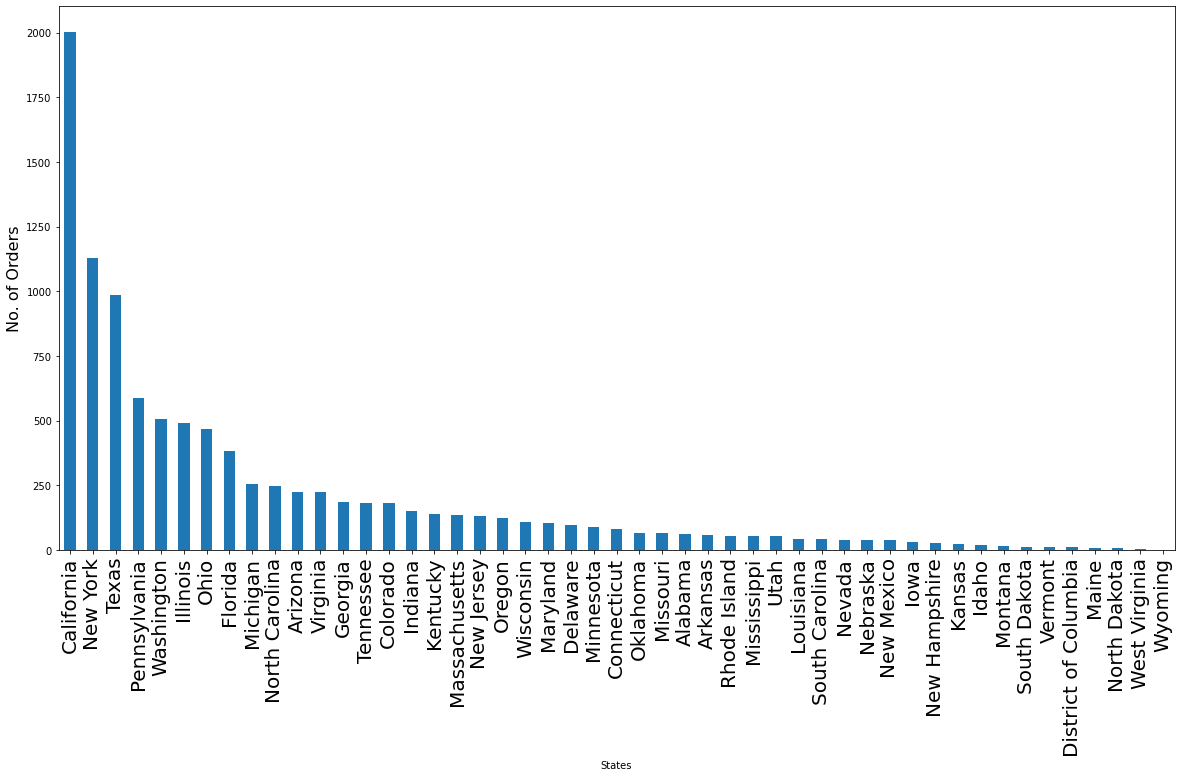

In [13]:
plt.figure(figsize=(20,10))
df['State'].value_counts().plot.bar()
plt.xlabel('States', size=10)
plt.xticks(size = 20)
plt.ylabel('No. of Orders', size = 16)
plt.show()

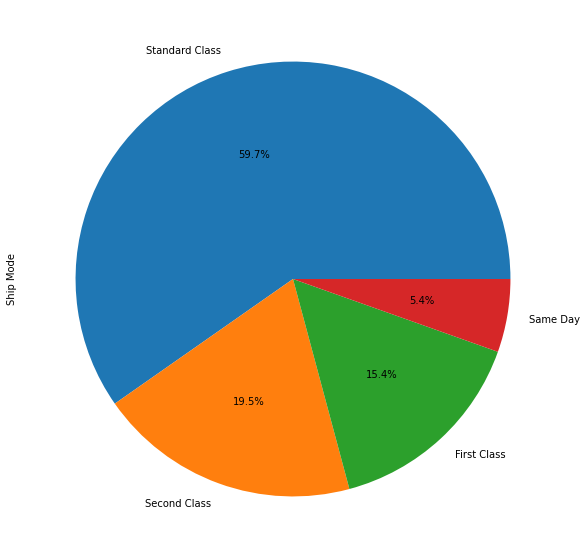

In [14]:
plt.figure(figsize=(20,10))
df['Ship Mode'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

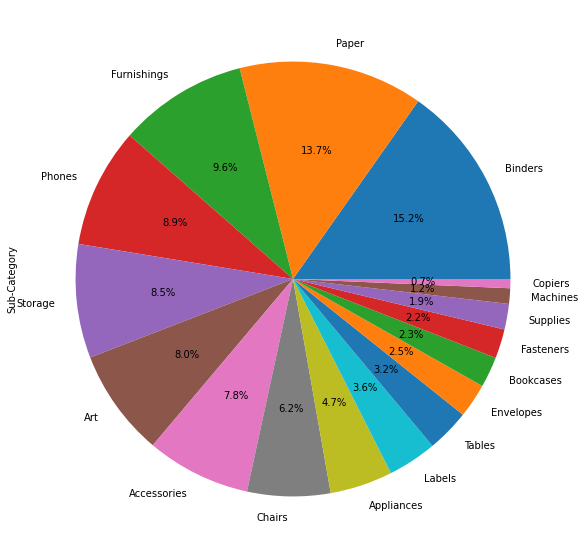

In [15]:
plt.figure(figsize=(20,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

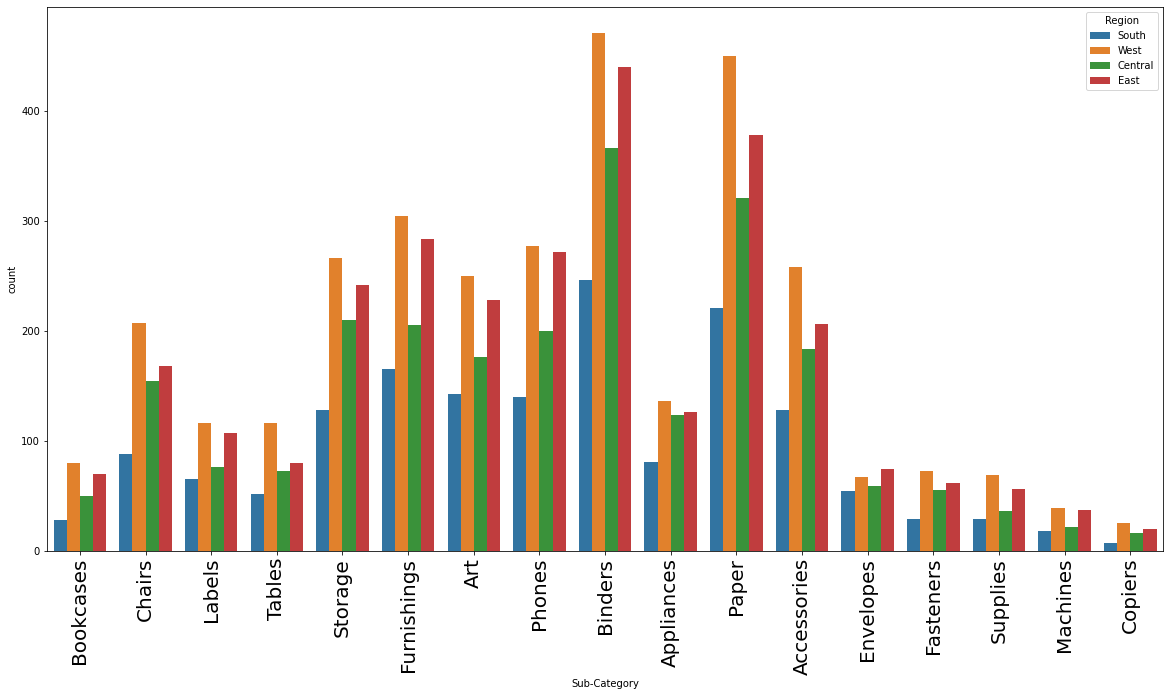

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sub-Category',hue="Region", data=df)
plt.xticks(rotation="vertical", size=20)
plt.show()

In [17]:
sales=pd.DataFrame(df.groupby('Sub-Category').sum()['Sales'])
sales

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


### Visualizing it on the Graphs

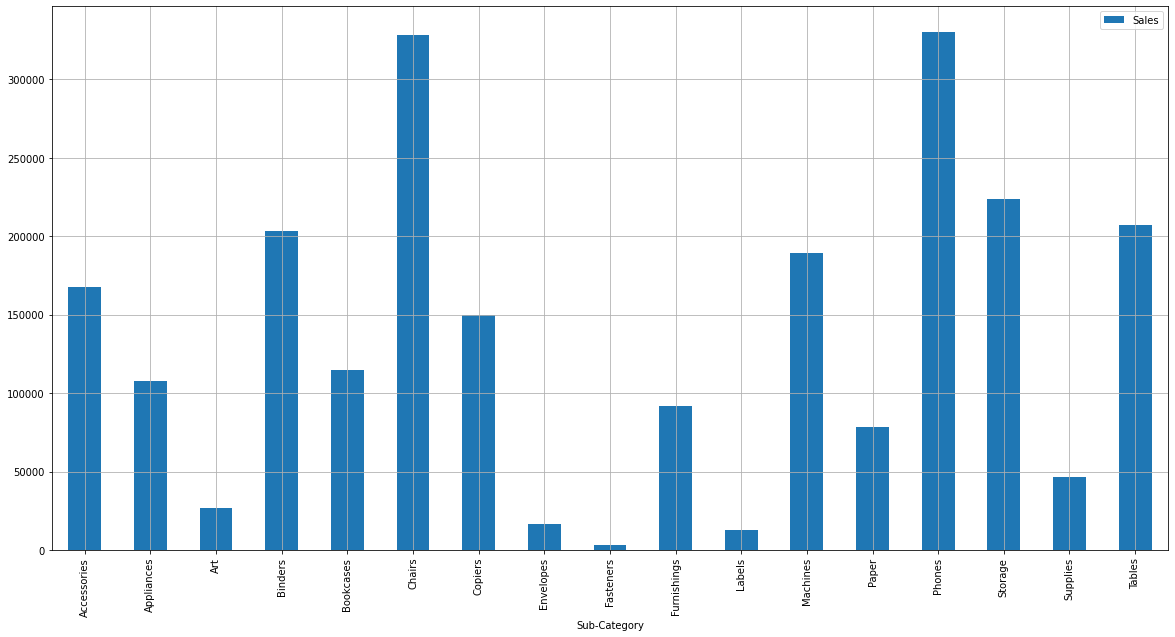

In [18]:
sales.plot.bar(figsize=(20,10), grid=True)
plt.show()

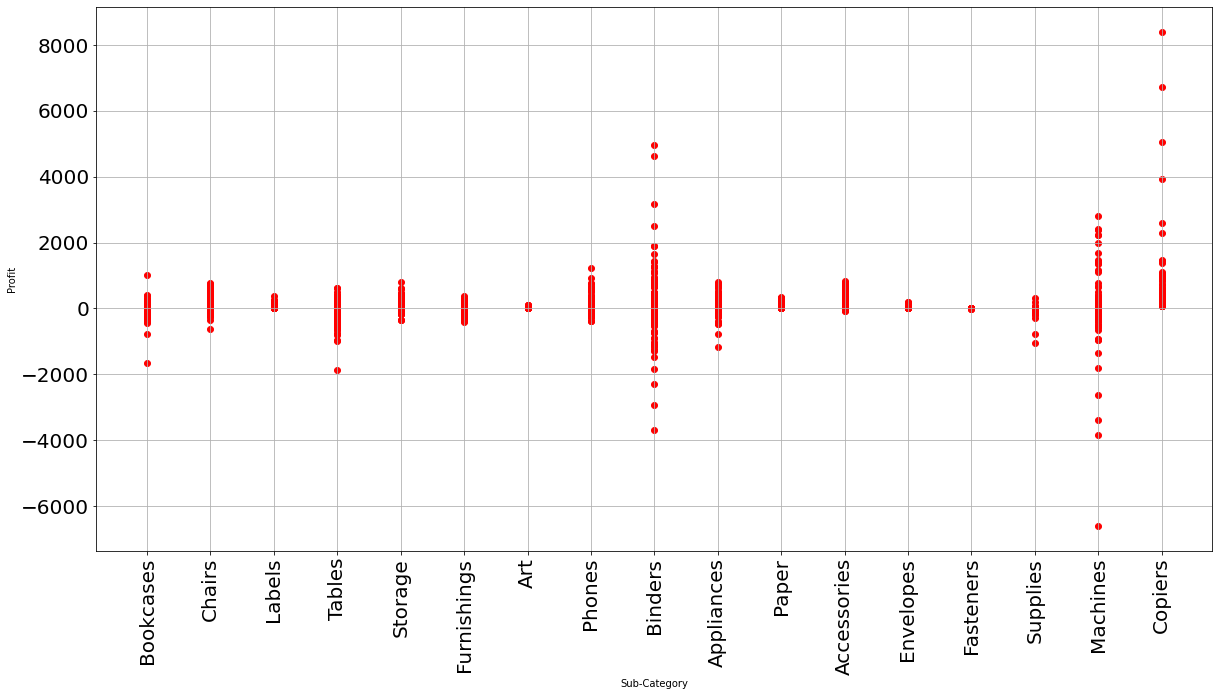

In [19]:
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter("Sub-Category","Profit", c="r", data=df)
plt.xticks(rotation="vertical", size=20)
plt.xlabel('Sub-Category')
plt.yticks(size=20)
plt.ylabel('Profit')
plt.show()

In [20]:
profit=pd.DataFrame(df.groupby('Sub-Category').sum()['Profit'])
profit

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


### Visualizing the Results 

In [ ]:
profit.plot.bar(figsize=(20,10),grid=True)
plt.show()

In [ ]:
profit=profit.sort_values('Profit', ascending=False)
profit

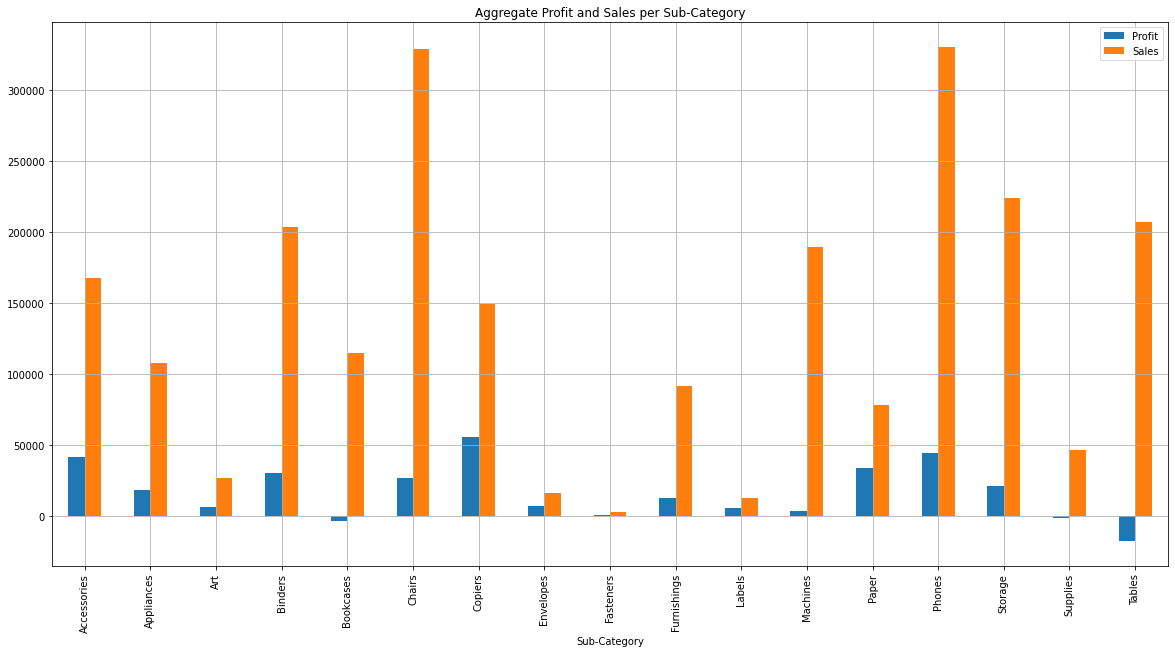

In [ ]:
df.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(figsize=(20,10))
plt.grid()
plt.title("Aggregate Profit and Sales per Sub-Category")
plt.show()

#### States where store is getting more profit

In [ ]:
state_profit=pd.DataFrame(df.groupby('State').sum()['Profit'])
state_profit.sort_values('Profit', ascending=False)

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


<AxesSubplot:ylabel='Profit'>

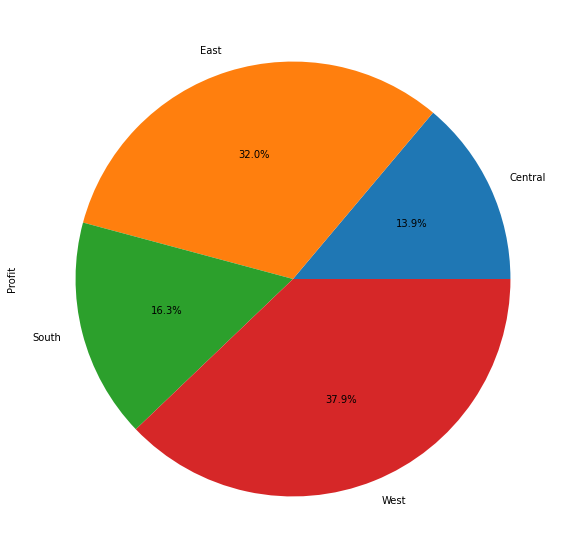

In [ ]:
plt.figure(figsize=(20,10))
df.groupby('Region').sum()['Profit'].plot.pie(autopct='%1.1f%%')